<a href="https://colab.research.google.com/github/LetiRenguera/Pre-entrega-DataScience1CH/blob/main/Entrega1datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **PRE ENTREGA DATA SCIENCE 1 **


*INTRODUCCIÓN*

El tema de interés seleccionado para el desarrollo de la pre-entrega y luego entrega final es el análisis de estudiantes de matemáticas y su evolución para la aprobación de la materia.

La base de datos corresponde al país de Portugal, y tiene como objeto de estudio dos colegios. Los estudiantes son mujeres y varones entre 15 y 22 años.

Lo que intento analizar es la relación de éxito en la aprobación de la asignatura Matemática según la edad del estudiante y otras variables como la cantidad de tiempo libre, el tiempo de estudio y si poseen una relación amorosa. Tambien, comprobar si existe una correlación entre el nivel de educación y el tipo de trabajo de los tutores madres y padres de los alumnos y la notal final obtenida de la materia. Para ello defino las hipótesis a investigar.



***HIPOTESIS DE INVESTIGACIÓN***

 - HIPOTESIS 1


LOS ESTUDIANTES DE MADRES Y PADRES QUE NO TRABAJAN O POSEEN TRABAJO PRECARIOS APRUEBAN MENOS MÁTEMATICA.

- HIPOTESIS 2

LOS ESTUDIANTES QUE SE ENCUENTRAN EN UNA RELACIÓN AMOROSA OBTIENEN MEJORES NOTAS.

- HIPOTESIS 3

LOS ESTUDIANTES CON MAYOR TIEMPO LIBRE OBTIENEN MEJORES NOTAS MIENTRAS QUE LOS ESTUDIANTES QUE MÁS SALEN CON AMIGOS Y CONSUMEN ALCOHOL OBTIENEN PEORES NOTAS.


Para empezar, importo las bibliotecas y especifico la ruta del archivo para comenzar a analizar qué tipo de datos tengo. Proporcionamos algunos prompts para obtener información general sobre la base de datos, el tipo de datos y si contienen valores nulos.

In [ ]:
# importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:


# ingresamos la direccion del dataframe e investigamos los datos que contiene
url = 'https://raw.githubusercontent.com/LetiRenguera/Pre-entrega-DataScience1CH/main/student-mat.csv'
df = pd.read_csv(url)
print(df.head(5))


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


En esta primera entrada, se observo que el dataset contiene 33 columnas, y en las primeras 5 filas puedo verificar que contiene datos númericos y de texto.

In [ ]:
# investigamos el tamaño o dimensión del dataframe
dimensiondf = df.shape
print(dimensiondf)

(395, 33)


# Traducimos los atributos para entender el objetivo de los datos.

***    Información de atributos: ***
1. escuela - escuela del estudiante (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
2. sexo - sexo del estudiante (binario: 'F' - femenino o 'M' - masculino)
3. Edad - Edad del estudiante (numérico: de 15 a 22)
4. Dirección: tipo de dirección de la casa del estudiante (binario: 'U' - urbano o 'R' - rural)
5. famsize - tamaño de la familia (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor que 3)
6. Pstatus: estado de convivencia de los padres (binario: 'T' - convivencia o 'A' - separación)
7. Medu - educación de la madre (numérico: 0 - ninguno, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior)
8. Fedu - educación del padre (numérico: 0 - ninguno, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior)
9. Mjob: trabajo de la madre (nominal: 'profesora', 'salud' relacionada con la atención, 'servicios' civiles (por ejemplo, administrativos o policiales), 'en casa' u 'otro')
10. Fjob - trabajo del padre (nominal: 'profesor', 'relacionado con la salud', 'servicios' civiles (por ejemplo, administrativos o policiales), 'en casa' u 'otro')
11. Razón - Razón para elegir esta escuela (nominal: cerca de 'casa', 'reputación' de la escuela, preferencia de 'curso' u 'otra')
12. Tutor - Tutor del estudiante (nominal: 'madre', 'padre' u 'otro')
13. Tiempo de viaje - Tiempo de viaje de casa a la escuela (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, o 4 - >1 hora)
14. Tiempo de estudio - Tiempo de estudio semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)
15. failures - número de fallos de clase pasados (numérico: n si 1<=n<3, else 4)
16. SchoolsUP - Apoyo Educativo Extra (Binario: Sí o No)
17. FAMSUP - Apoyo Educativo Familiar (Binario: Sí o No)
18. paid - clases extra pagadas dentro de la materia del curso (Matemáticas o Portugués) (binario: sí o no)
19. Actividades - Actividades extracurriculares (binario: sí o no)
20. Nursery - Asistió a la escuela infantil (binario: sí o no)
21. higher - quiere tomar educación superior (binario: sí o no)
22. internet - Acceso a internet en casa (binario: sí o no)
23. Romántico - con una relación romántica (binario: sí o no)
24. Famrel - Calidad de las relaciones familiares (numérico: de 1 - muy malo a 5 - excelente)
25. Tiempo libre - Tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)
26. Goout - Salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto)
27. Dalc - consumo de alcohol en la jornada laboral (numérico: de 1 - muy bajo a 5 - muy alto)
28. Walc - consumo de alcohol durante el fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)
29. health -Salud - estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno)
30. absents- Ausencias - Número de ausencias escolares (numérico: de 0 a 93).
31. G1 - calificación del primer período (numérica: de 0 a 20)
32. G2 - calificación del segundo período (numérica: de 0 a 20)
33. G3 - calificación final (numérica: de 0 a 20, objetivo de salida)


In [ ]:
# Información general del dataframe.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

El tipo de dato obervado es int64, datos del estilo númerico y datos object correspondientes a datos compuesto por caracteres o números. Además, se puede observar que no contiene datos nulos.

In [ ]:
# Verificar las columnas disponibles.
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


Obervamos los titulos de las columnas que nos permmiten ir conociendo mejor el contenido del dataframe.
traducimos las columnas.
'escuela', 'sexo', 'edad', 'dirección', 'tamaño de familia', 'estado de la familia', 'medio', 'fedu',
'trabajo', 'trabajo', 'motivo', 'tutor', 'tiempo de viaje', 'tiempo de estudio',
'fracasos', 'escuela', 'escuela', 'pagado', 'actividades', 'guardería',
'superior', 'internet', 'romántico', 'familia', 'tiempo libre', 'salir', 'Dalc',
'Walc', 'salud', 'ausencias', 'G1', 'G2', 'G3'],





Para continuar con el análisis de los datos, creo algunas variables para empezar a construir algunas agrupaciones y sumas de datos.


In [ ]:
# calculo cantidad de Género Femenino y Masculino
df['sex'].value_counts()

,count
sex,
F,208
M,187


In [ ]:
# defino la variable "edad" y cuento agrupado por edad.
edad =  df['age']
print (edad.value_counts())


age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64


In [ ]:
# Defino la variable "Género" y cuento agrupado por género.
genero = df['sex']
print(genero.value_counts())

sex
F    208
M    187
Name: count, dtype: int64


In [ ]:
# Buscamos agrupar los datos de las variables edad y género para sumar en totales.
genero_edad = df.groupby(['sex', 'age']).size()
print(genero_edad.sum)

<bound method Series.sum of sex  age
F    15     38
     16     54
     17     58
     18     43
     19     14
     20      1
M    15     44
     16     50
     17     40
     18     39
     19     10
     20      2
     21      1
     22      1
dtype: int64>


In [ ]:
# Calculo la cantidad de estudiantes en una relación amorosa.
Romance = df['romantic']
print(Romance.value_counts())


romantic
no     263
yes    132
Name: count, dtype: int64


In [ ]:
# Quiero agrupar la cantidad de estudiantes de novio por sexo y edad.
estudiantes_novios= df.groupby(['age', 'sex', 'romantic'])['romantic'].count().reset_index(name='count')
print(estudiantes_novios)

    age sex romantic  count
0    15   F       no     28
1    15   F      yes     10
2    15   M       no     35
3    15   M      yes      9
4    16   F       no     39
5    16   F      yes     15
6    16   M       no     37
7    16   M      yes     13
8    17   F       no     33
9    17   F      yes     25
10   17   M       no     28
11   17   M      yes     12
12   18   F       no     22
13   18   F      yes     21
14   18   M       no     25
15   18   M      yes     14
16   19   F       no      7
17   19   F      yes      7
18   19   M       no      6
19   19   M      yes      4
20   20   F      yes      1
21   20   M       no      2
22   21   M       no      1
23   22   M      yes      1


In [ ]:
# Defino las variables para el trabajo paterno y materno y obtengo valores según los tipos de trabajo.
trabajo_madre = df['Mjob']
trabajo_padre = df['Fjob']
print(trabajo_madre.value_counts())
print(trabajo_padre.value_counts())

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64


In [ ]:
# Defino las variables para el nivel de educación de padres y madres.
nivel_de_educacion_madre = df[('Fedu')]
nivel_de_educacion_padre = df[('Medu')]
print(nivel_de_educacion_madre.value_counts())
print(nivel_de_educacion_padre.value_counts())

Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64


In [ ]:
Consumo_de_alcohol_semanal = df['Dalc']
consumo_de_alcohol_fin_de_semana = df['Walc']
tiempo_libre = df['freetime']
salidas_con_amigos = df['goout']



In [ ]:
# analizamos en función de los patrones de uso del tiempo libre para comparar las notas finales alcanzadas
resultado_notas = df['G3']
uso_del_tiempo = df[['age', 'Dalc', 'Walc', 'freetime', 'goout','G3']]
uso_del_tiempo = uso_del_tiempo.set_index(df.index)
uso_del_tiempo= uso_del_tiempo.rename(columns={
       'Dalc': 'Alcohol_diario',
       'Walc': 'Alcohol_semanal',
       'freetime': 'Tiempo_libre',
       'goout': 'Salidas_amigos'})
print(uso_del_tiempo)

     age  Alcohol_diario  Alcohol_semanal  Tiempo_libre  Salidas_amigos  G3
0     18               1                1             3               4   6
1     17               1                1             3               3   6
2     15               2                3             3               2  10
3     15               1                1             2               2  15
4     16               1                2             3               2  10
..   ...             ...              ...           ...             ...  ..
390   20               4                5             5               4   9
391   17               3                4             4               5  16
392   21               3                3             5               3   7
393   18               3                4             4               1  10
394   19               3                3             2               3   9

[395 rows x 6 columns]


In [ ]:
# comparamos la variable tiempo de estudio con las notas finales y clasificamos arbitrariamente en "aprobo" si es mayor a 10 y "no aprobo" si es menor a 10, en una escala de 0 a 20.

tiempo_de_estudio = df['studytime']
resultado_notas = df['G3']
calidad_tiemporesultado = df[['studytime', 'G3']]
calidad_tiemporesultado['resultado'] = calidad_tiemporesultado['G3'].apply(lambda x: 'aprobo' if x >= 10 else 'desaprobo')
calidad_tiemporesultado = calidad_tiemporesultado.rename(columns={'studytime': 'tiempo_de_estudio', 'G3': 'resultado_notas', 'resultado': 'resultado'})
print(calidad_tiemporesultado)


     tiempo_de_estudio  resultado_notas  resultado
0                    2                6  desaprobo
1                    2                6  desaprobo
2                    2               10     aprobo
3                    3               15     aprobo
4                    2               10     aprobo
..                 ...              ...        ...
390                  2                9  desaprobo
391                  1               16     aprobo
392                  1                7  desaprobo
393                  1               10     aprobo
394                  1                9  desaprobo

[395 rows x 3 columns]


<ipython-input-19-5b5011aa71b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calidad_tiemporesultado['resultado'] = calidad_tiemporesultado['G3'].apply(lambda x: 'aprobo' if x >= 10 else 'desaprobo')


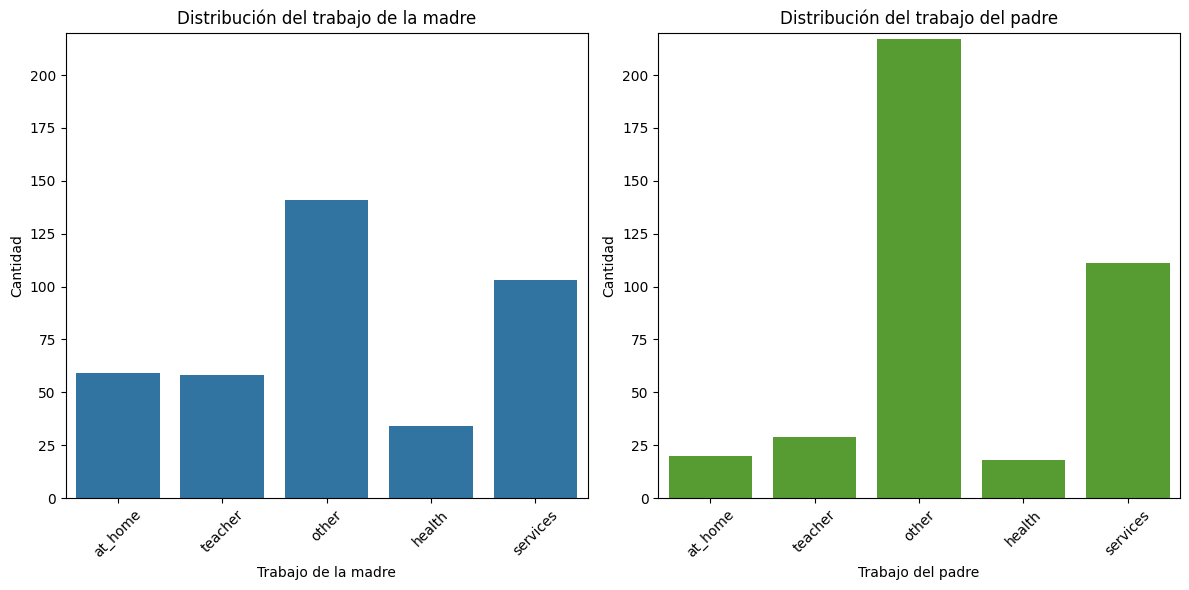

In [ ]:
# Gráfico para comparar la distribución del trabajo de madre y padre.

# Defino variables para trabajo de madre y padre.
trabajo_madre = df['Mjob']
trabajo_padre = df['Fjob']

# unifico las columnas que esten en el mismo orden
job_categories = pd.unique(df[['Mjob', 'Fjob']].values.ravel())

# Creo 2 figuras subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# realizo la dsitribución de las clasdes de trabajo para madres.
sns.countplot(x=trabajo_madre, ax=axes[0], order=job_categories,  )
axes[0].set_title('Distribución del trabajo de la madre')
axes[0].set_xlabel('Trabajo de la madre')
axes[0].set_ylabel('Cantidad')

# realizo la dsitribución de las clases de trabajo para padres.
sns.countplot(x=trabajo_padre, ax=axes[1], order=job_categories, color="#50AE20")
axes[1].set_title('Distribución del trabajo del padre')
axes[1].set_xlabel('Trabajo del padre')
axes[1].set_ylabel('Cantidad')

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# establezco el limite superior para el eje y, para que los graficos tengan la misma escala.
axes[0].set_ylim(0, 220)
axes[1].set_ylim(0, 220)

plt.tight_layout()
plt.show()

En el gráfico de barras, comparamos el tipo de trabajo entre las madres y padres. Se observa que, es mayor la cantidad de madres que se dedican a tareas del hogar respecto de los padres. También, observamos que los padres se dedican mucho más a otro tipo de rubros y no tanto , a la enseñanza, salud y servicios.


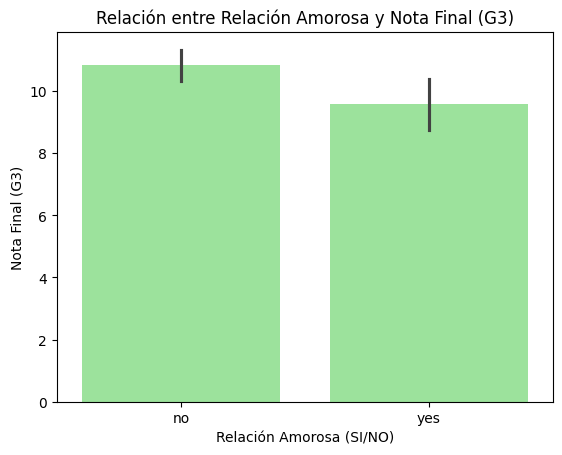

In [ ]:

# Gráfico de barras para definir notas y relación amorosa.
sns.barplot(x="romantic", y="G3", data=df , color="#90EE90")
plt.title("Relación entre Relación Amorosa y Nota Final (G3)")
plt.xlabel("Relación Amorosa (SI/NO)")
plt.ylabel("Nota Final (G3)")
plt.show()

En este gráfico, podemos visualizar rapidamente que los estudiantes que no se encuentran en una relación amorosa alcanzan notas más altas.

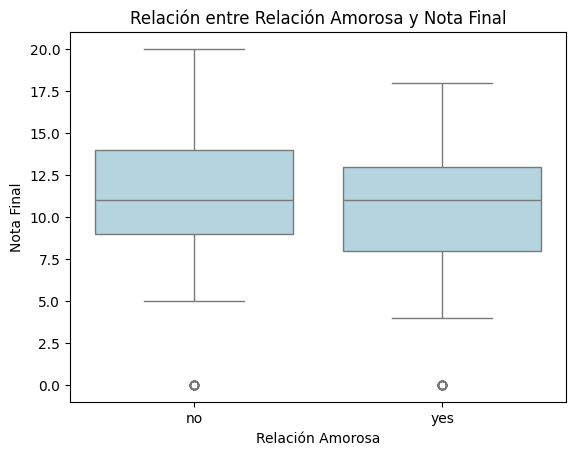

In [ ]:
sns.boxplot(x="romantic", y="G3", data=df, color="lightblue")
plt.title("Relación entre Relación Amorosa y Nota Final")
plt.xlabel("Relación Amorosa")
plt.ylabel("Nota Final")
plt.show()

USe caja de bigotes para visualizar la nota final según el estado de relación amorosa.
La caja de bigotes

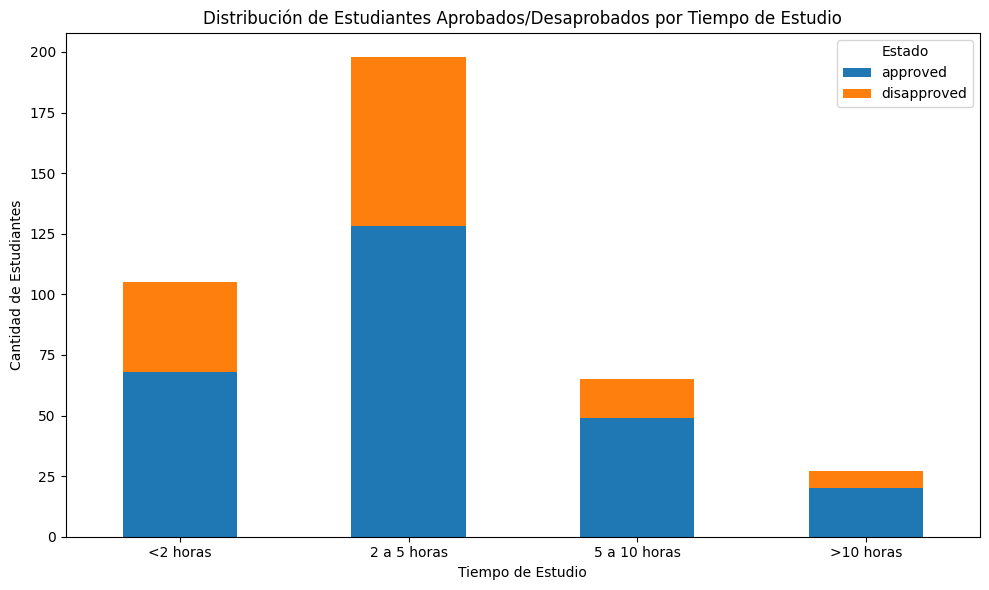

In [ ]:
# Create a new column 'approved' based on 'G3'
df['approved'] = df['G3'].apply(lambda x: 'approved' if x >= 10 else 'disapproved')

# Group data by 'studytime' and 'approved' and count occurrences
studytime_approved = df.groupby(['studytime', 'approved'])['approved'].count().reset_index(name='count')

# Create a pivot table for the stacked bar chart
studytime_pivot = studytime_approved.pivot(index='studytime', columns='approved', values='count')

# Define custom labels for study time categories
studytime_labels = {
    1: "<2 horas",
    2: "2 a 5 horas",
    3: "5 a 10 horas",
    4: ">10 horas"
}

# Create the stacked bar chart
studytime_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Estudiantes Aprobados/Desaprobados por Tiempo de Estudio')
plt.xlabel('Tiempo de Estudio')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(np.arange(len(studytime_pivot.index)), [studytime_labels.get(st) for st in studytime_pivot.index], rotation=0)
plt.legend(title='Estado', loc='upper right')
plt.tight_layout()
plt.show()

En este gráfico de barras apiladas, se muestra la relación de la cantidad de tiempo de estudio y si aprobó o no. Indicando una mayor tendencia hacia mas horas de estudio menos desaprobados.